In [2]:
import numpy as np

n_features = 784  # Assuming this is defined somewhere earlier in your code
n_nodes1 = 400
sigma = 0.01  # Standard deviation for Gaussian distribution
W1 = sigma * np.random.randn(n_features, n_nodes1)


In [3]:
import numpy as np

# Activation functions
def sigmoid(A):
    return 1 / (1 + np.exp(-A))

def tanh(A):
    return np.tanh(A)

def softmax(A):
    exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))  # For numerical stability
    return exp_A / np.sum(exp_A, axis=1, keepdims=True)

# Dimensions
batch_size = 20
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10

# Random initialization of weights and biases
np.random.seed(42)  # For reproducibility
sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
B1 = sigma * np.random.randn(1, n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
B2 = sigma * np.random.randn(1, n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
B3 = sigma * np.random.randn(1, n_output)

# Example input (randomly generated)
X = np.random.randn(batch_size, n_features)  # Input data

# Forward propagation
# First layer
A1 = np.dot(X, W1) + B1  # (batch_size, n_nodes1)
Z1 = sigmoid(A1)         # Activation output (batch_size, n_nodes1)

# Second layer
A2 = np.dot(Z1, W2) + B2  # (batch_size, n_nodes2)
Z2 = sigmoid(A2)          # Activation output (batch_size, n_nodes2)

# Third layer (output layer)
A3 = np.dot(Z2, W3) + B3  # (batch_size, n_output)
Z3 = softmax(A3)          # Output probabilities (batch_size, n_output)

# Print the output of the final layer
print("Output probabilities (Z3):")
print(Z3)


Output probabilities (Z3):
[[0.08707787 0.09807587 0.10892563 0.10088912 0.09812328 0.10153805
  0.10160191 0.11449866 0.08932339 0.09994621]
 [0.08701323 0.09819374 0.10890171 0.10089879 0.09802686 0.10154606
  0.10156672 0.1145587  0.08931331 0.09998088]
 [0.0870763  0.09809005 0.10882201 0.10093728 0.09811015 0.10150397
  0.10159724 0.11454439 0.08937888 0.09993973]
 [0.08710675 0.09813152 0.10886121 0.10092234 0.09804378 0.10146177
  0.10159305 0.11461467 0.08936318 0.09990173]
 [0.08704607 0.09809277 0.10878917 0.10090749 0.09812982 0.10146494
  0.10163876 0.11451533 0.08937303 0.10004263]
 [0.08703857 0.09816421 0.10891896 0.10097083 0.09812329 0.10156047
  0.10153663 0.11445944 0.08933581 0.09989179]
 [0.08695593 0.09813369 0.10897804 0.10092174 0.09816743 0.10141663
  0.10160816 0.11454084 0.08929153 0.09998602]
 [0.08705105 0.09812315 0.10890834 0.10097737 0.09799922 0.10143258
  0.10156629 0.11456603 0.08941991 0.09995607]
 [0.08703543 0.09818455 0.10890429 0.10092272 0.09807

In [4]:
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss.

    Parameters:
    y_true (ndarray): One-hot encoded true labels (batch_size, n_classes)
    y_pred (ndarray): Predicted probabilities (batch_size, n_classes)

    Returns:
    float: Cross-entropy loss
    """
    # Adding a small value to avoid log(0)
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

# Example usage
# y_true: One-hot encoded true labels (batch_size, n_classes)
# y_pred: Predicted probabilities (batch_size, n_classes)
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Example true labels
y_pred = np.array([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.2, 0.3, 0.5]])  # Example predictions

loss = cross_entropy_loss(y_true, y_pred)
print(f"Cross-Entropy Loss: {loss}")


Cross-Entropy Loss: 0.34055041584399376


In [5]:
import numpy as np

def tanh_derivative(x):
    """Derivative of tanh activation function."""
    return 1 - np.tanh(x)**2

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid activation function."""
    sig = sigmoid(x)
    return sig * (1 - sig)

def softmax(x):
    """Softmax activation function."""
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def initialize_parameters(n_features, n_nodes1, n_nodes2, n_output):
    """Initialize weights and biases."""
    params = {
        'W1': np.random.randn(n_features, n_nodes1) * 0.01,
        'B1': np.zeros((1, n_nodes1)),
        'W2': np.random.randn(n_nodes1, n_nodes2) * 0.01,
        'B2': np.zeros((1, n_nodes2)),
        'W3': np.random.randn(n_nodes2, n_output) * 0.01,
        'B3': np.zeros((1, n_output))
    }
    return params

def forward_propagation(X, params):
    """Perform forward propagation."""
    # First layer
    A1 = np.dot(X, params['W1']) + params['B1']
    Z1 = np.tanh(A1)

    # Second layer
    A2 = np.dot(Z1, params['W2']) + params['B2']
    Z2 = np.tanh(A2)

    # Third layer
    A3 = np.dot(Z2, params['W3']) + params['B3']
    Z3 = softmax(A3)

    cache = {'A1': A1, 'Z1': Z1, 'A2': A2, 'Z2': Z2, 'A3': A3, 'Z3': Z3}
    return Z3, cache

def backward_propagation(X, Y, params, cache):
    """Perform backward propagation."""
    batch_size = X.shape[0]

    # Gradients for the third layer
    dA3 = (cache['Z3'] - Y) / batch_size
    dW3 = np.dot(cache['Z2'].T, dA3)
    dB3 = np.sum(dA3, axis=0, keepdims=True)
    dZ2 = np.dot(dA3, params['W3'].T)

    # Gradients for the second layer
    dA2 = dZ2 * tanh_derivative(cache['A2'])
    dW2 = np.dot(cache['Z1'].T, dA2)
    dB2 = np.sum(dA2, axis=0, keepdims=True)
    dZ1 = np.dot(dA2, params['W2'].T)

    # Gradients for the first layer
    dA1 = dZ1 * tanh_derivative(cache['A1'])
    dW1 = np.dot(X.T, dA1)
    dB1 = np.sum(dA1, axis=0, keepdims=True)

    grads = {'dW1': dW1, 'dB1': dB1, 'dW2': dW2, 'dB2': dB2, 'dW3': dW3, 'dB3': dB3}
    return grads

def update_parameters(params, grads, learning_rate):
    """Update parameters using gradients."""
    params['W1'] -= learning_rate * grads['dW1']
    params['B1'] -= learning_rate * grads['dB1']
    params['W2'] -= learning_rate * grads['dW2']
    params['B2'] -= learning_rate * grads['dB2']
    params['W3'] -= learning_rate * grads['dW3']
    params['B3'] -= learning_rate * grads['dB3']
    return params

# Example training loop
def train(X, Y, n_features, n_nodes1, n_nodes2, n_output, learning_rate, epochs):
    """Train the neural network."""
    params = initialize_parameters(n_features, n_nodes1, n_nodes2, n_output)
    
    for epoch in range(epochs):
        # Forward propagation
        Z3, cache = forward_propagation(X, params)

        # Compute loss (optional for monitoring)
        loss = -np.sum(Y * np.log(Z3 + 1e-7)) / X.shape[0]

        # Backward propagation
        grads = backward_propagation(X, Y, params, cache)

        # Update parameters
        params = update_parameters(params, grads, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return params

# Example usage
np.random.seed(42)
X = np.random.rand(20, 784)  # Random feature data (batch_size=20, n_features=784)
Y = np.eye(10)[np.random.choice(10, 20)]  # Random one-hot encoded labels (batch_size=20, n_output=10)
params = train(X, Y, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, epochs=1000)


Epoch 0, Loss: 2.3034653576521715
Epoch 100, Loss: 2.1754558606531598
Epoch 200, Loss: 1.955656366320499
Epoch 300, Loss: 1.8978339428767423
Epoch 400, Loss: 1.8590694689557403
Epoch 500, Loss: 1.7993563430247292
Epoch 600, Loss: 1.6606375104361522
Epoch 700, Loss: 1.3429104693454363
Epoch 800, Loss: 0.9317671935782981
Epoch 900, Loss: 0.6451560510914666


In [7]:
def estimate(X, params):
    """Perform estimation on input X using the trained parameters."""
    Z3, _ = forward_propagation(X, params)  # Get the output probabilities
    predictions = np.argmax(Z3, axis=1)  # Get the index of the maximum probability
    return predictions
# Assuming you have trained the network with `train()` function and have `params`:
X_test = np.random.rand(5, 784)  # Example test data with 5 samples, each of size 784 (like MNIST)
predictions = estimate(X_test, params)

print("Predictions:", predictions)


Predictions: [2 2 2 5 5]


In [9]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset manually from OpenML
mnist = fetch_openml('mnist_784')

# Extract features and labels
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int32)

# Normalize the pixel values to be between 0 and 1
X /= 255.0

# One-hot encode labels
Y = np.eye(10)[y]

# Split the data into training and test sets (train 80%, test 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Neural network training function (as defined previously)
def train(X, Y, n_features, n_nodes1, n_nodes2, n_output, learning_rate, epochs):
    """Train the neural network."""
    params = initialize_parameters(n_features, n_nodes1, n_nodes2, n_output)
    
    for epoch in range(epochs):
        # Forward propagation
        Z3, cache = forward_propagation(X, params)

        # Compute loss (optional for monitoring)
        loss = -np.sum(Y * np.log(Z3 + 1e-7)) / X.shape[0]

        # Backward propagation
        grads = backward_propagation(X, Y, params, cache)

        # Update parameters
        params = update_parameters(params, grads, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return params

# Estimation function (as defined previously)
def estimate(X, params):
    """Perform estimation on input X using the trained parameters."""
    Z3, _ = forward_propagation(X, params)  # Get the output probabilities
    predictions = np.argmax(Z3, axis=1)  # Get the index of the maximum probability
    return predictions

# Train the model
np.random.seed(42)
params = train(X_train, Y_train, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, epochs=1000)

# Estimate predictions on the test set
predictions = estimate(X_test, params)

# Calculate accuracy
accuracy = np.mean(predictions == np.argmax(Y_test, axis=1))  # Compare predictions with true labels
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 0, Loss: 2.302215619582629
Epoch 100, Loss: 2.299621332985759
Epoch 200, Loss: 2.296819501703531
Epoch 300, Loss: 2.293530855331935
Epoch 400, Loss: 2.2893605846509564
Epoch 500, Loss: 2.283682042255561
Epoch 600, Loss: 2.2754055119391117
Epoch 700, Loss: 2.2624800805294605
Epoch 800, Loss: 2.2407614645630933
Epoch 900, Loss: 2.2014298332319013
Test Accuracy: 41.14%


Epoch 0, Train Loss: 2.302215619582629, Validation Loss: 2.3022240221637063
Epoch 100, Train Loss: 2.299621332985759, Validation Loss: 2.2996030228884172
Epoch 200, Train Loss: 2.296819501703531, Validation Loss: 2.2967788246741905
Epoch 300, Train Loss: 2.293530855331935, Validation Loss: 2.2934738473090115
Epoch 400, Train Loss: 2.2893605846509564, Validation Loss: 2.2892959904704346
Epoch 500, Train Loss: 2.283682042255561, Validation Loss: 2.2836234010668197
Epoch 600, Train Loss: 2.2754055119391117, Validation Loss: 2.275375372133574
Epoch 700, Train Loss: 2.2624800805294605, Validation Loss: 2.262518561299426
Epoch 800, Train Loss: 2.2407614645630933, Validation Loss: 2.2409428812161822
Epoch 900, Train Loss: 2.2014298332319013, Validation Loss: 2.201886492858762


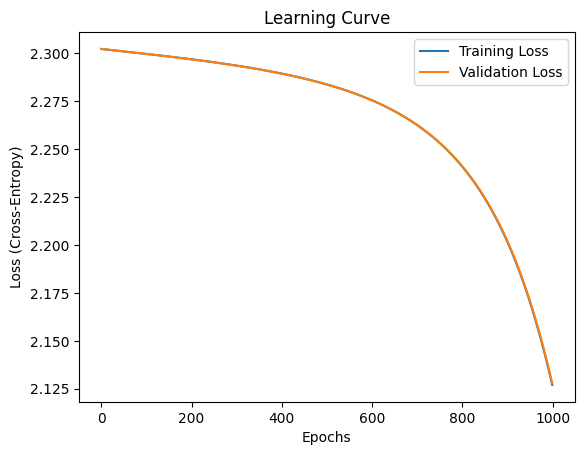

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset manually from OpenML
mnist = fetch_openml('mnist_784')

# Extract features and labels
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int32)

# Normalize the pixel values to be between 0 and 1
X /= 255.0

# One-hot encode labels
Y = np.eye(10)[y]

# Split the data into training and test sets (train 80%, test 20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Neural network functions (same as before)

def train(X_train, Y_train, X_val, Y_val, n_features, n_nodes1, n_nodes2, n_output, learning_rate, epochs):
    """Train the neural network and record training/validation loss."""
    params = initialize_parameters(n_features, n_nodes1, n_nodes2, n_output)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Forward propagation on training data
        Z3_train, cache_train = forward_propagation(X_train, params)
        # Compute training loss
        train_loss = -np.sum(Y_train * np.log(Z3_train + 1e-7)) / X_train.shape[0]
        
        # Forward propagation on validation data
        Z3_val, _ = forward_propagation(X_val, params)
        # Compute validation loss
        val_loss = -np.sum(Y_val * np.log(Z3_val + 1e-7)) / X_val.shape[0]

        # Backward propagation on training data
        grads = backward_propagation(X_train, Y_train, params, cache_train)

        # Update parameters
        params = update_parameters(params, grads, learning_rate)

        # Record the loss values
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Train Loss: {train_loss}, Validation Loss: {val_loss}")

    return params, train_losses, val_losses

def plot_learning_curve(train_losses, val_losses):
    """Plot the learning curve."""
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title("Learning Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (Cross-Entropy)")
    plt.legend()
    plt.show()

# Train the model
np.random.seed(42)
params, train_losses, val_losses = train(X_train, Y_train, X_val, Y_val, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, epochs=1000)

# Plot the learning curve
plot_learning_curve(train_losses, val_losses)


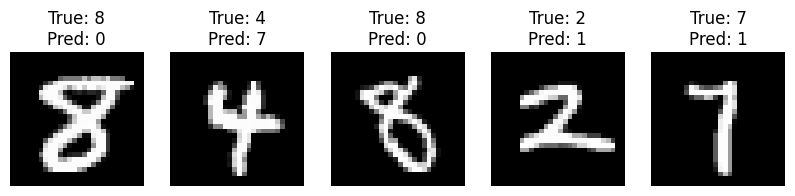

In [13]:
import pandas as pd

# Convert X_val to a NumPy array if it is not already
if isinstance(X_val, pd.DataFrame):  # Check if X_val is a DataFrame
    X_val = X_val.values  # Convert to NumPy array

# Display the misclassified images
def plot_misclassified_images(misclassified_indices, X_val, true_labels, predicted_labels, num_images=5):
    """Plot misclassified images with true and predicted labels."""
    plt.figure(figsize=(10, 5))
    for i in range(min(num_images, len(misclassified_indices))):
        idx = misclassified_indices[i]
        # Ensure X_val[idx] is correctly reshaped as a 28x28 image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_val[idx].reshape(28, 28), cmap='gray')  # Ensure NumPy array indexing
        plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
        plt.axis('off')
    plt.show()

# Display the first 5 misclassified images
plot_misclassified_images(misclassified_indices, X_val, true_labels, predicted_labels, num_images=5)
